In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

#Loading data
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#converted to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Import Seaborn

In [2]:
import seaborn as sns

Seaborn - Intro
Notes


Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Here's why you might use Seaborn over matplotlib:

Simplified Syntax: Less code for complex visualizations.

Built-in Themes: Predefined styles for attractive plots.

Better Color Handling: Advanced palette options and usage.

Statistical Plotting: Supports advanced plots like violin and box plots.

Data Frames Support: 
Direct plotting from pandas data structures.

Automatic Estimation: Built-in linear regression plotting.

Faceting: Easy creation of multi-plot grids for data comparison.

In [3]:
#Filter to Data Anayst Jobs in United States
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

#Dropna from column        
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [4]:
##We gonna need the skills for this, so lets just explode it
df_DA_US = df_DA_US.explode('job_skills')

## We need a count og skills and a median of salary, so lets do it by grouping and assign it to new variable
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_US_group


#Now, we are going to create two dataframes from our grouping, first of top 10 median salary and second for the top skills count

#Top 10 pay salary
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_top_pay

#Top 10 skills count, at last we sorted it with median again to get correctly formatted
df_DA_top_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10)
df_DA_top_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


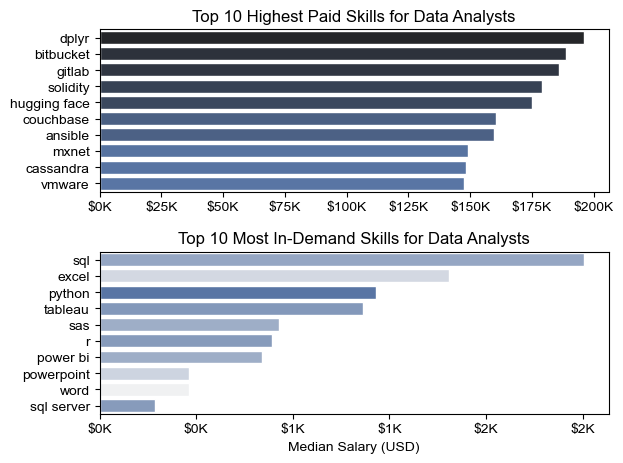

In [5]:
# Now we have to plot thse two on same chart using subplot

fig, ax = plt.subplots(2,1)
#We are not giving here x='job_Skills' in both because pandas will automatically use the index of the DataFrame as the axis labels.
#df_DA_top_pay.plot(kind='barh',  y='median', ax=ax[0], legend=False )

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median', y='job_skills', ax=ax[0],  hue='median', palette='dark:b_r')
#ax[0].invert_yaxis()
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#df_DA_top_skills.plot(kind='barh',  y='count', ax=ax[1],legend=False)
sns.barplot(data=df_DA_top_skills, x='count', y='job_skills', ax=ax[1],  hue='median', palette='light:b')
ax[1].legend().remove()
#ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')

ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()





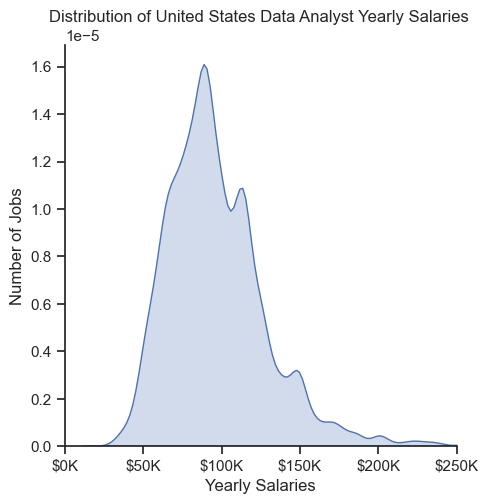

In [10]:
##Ploting Histogram
##We have used the displot along with kind=kde to get the smooth curved of data distribution

sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.xlim(0,250000)
plt.title('Distribution of United States Data Analyst Yearly Salaries ')
plt.xlabel('Yearly Salaries')
plt.ylabel('Number of Jobs')

##Format the x-axis
# Get the current Axes object (the chart area) for further customization
ax = plt.gca()

# Format the y-axis to show salaries in $K (thousands) instead of raw numbers
# Example: 80000 becomes "$80K"
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
)
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_14152\307106654.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


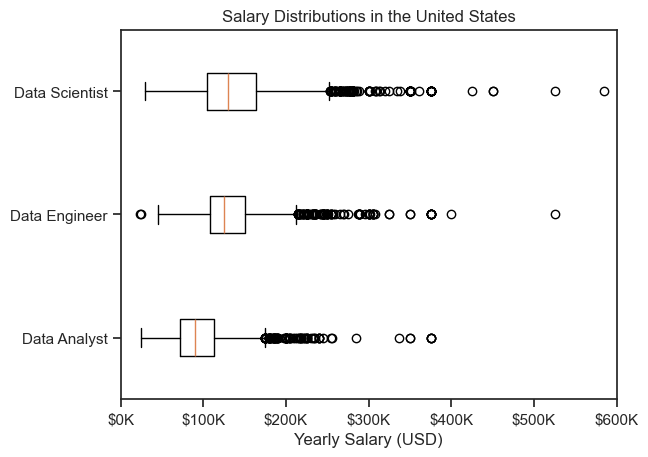

In [11]:
#Now for boxplot
#Filter to Data Anayst Jobs in United States
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()

#Dropna from column        
df_US = df_US.dropna(subset='salary_year_avg')

df_US['job_title_short'].value_counts()

job_list = [

    # For each job_title in the list job_titles,
    # filter df_US to only include rows where 'job_title_short' matches that job_title
    # then select the 'salary_year_avg' column
    df_US[df_US['job_title_short'] == job_title]['salary_year_avg']

    # Loop through each value in the job_titles list
    for job_title in job_titles
]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 

# Format x-axis to show 'Thousands'
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

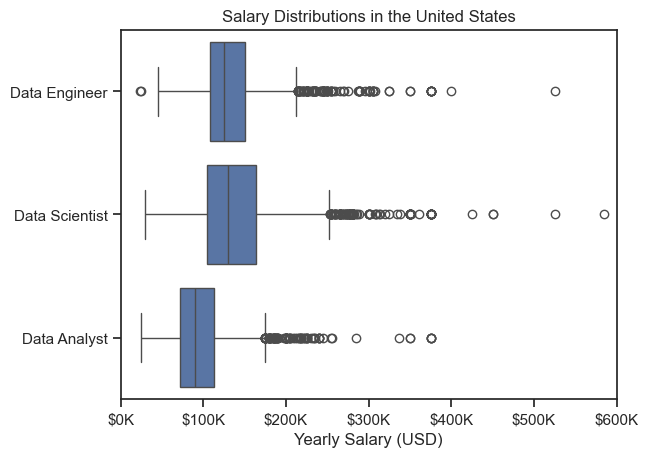

In [14]:
##Seaborn 
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 

# Format x-axis to show 'Thousands'
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()